In [41]:
%matplotlib inline
import numpy as np
from load_data import load_data

data, labels = load_data('train')

## Quick look at the data

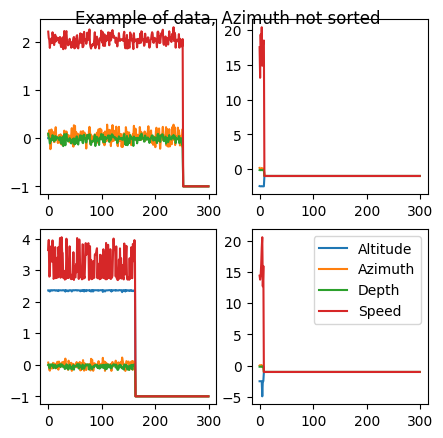

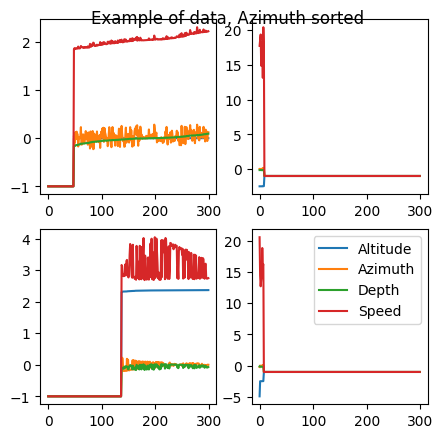

In [50]:
import matplotlib.pyplot as plt

names = ['Altitude', 'Azimuth', 'Depth', 'Speed']

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs = axs.flatten()

for i in range(4):

    for j in range(4):

        axs[i].plot(data[i, :, j], label=names[j])

plt.legend()
plt.suptitle('Example of data, Azimuth not sorted', y=0.9)
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs = axs.flatten()

for i in range(4):

    for j in range(4):

        axs[i].plot(data[i, np.argsort(data[i, :, 0]), j], label=names[j])

plt.legend()
plt.suptitle('Example of data, Azimuth sorted', y=0.9)
plt.show()

At some point, all values are in -1. Let's check if any datapoint has its value increasing after this point, i.e. can we remove all points once we reach -1

In [ ]:
for d in data:

    nan_index = np.where(d==-1)[0]
    min_index = nan_index.min()

    assert np.all(d[min_index:] == -1)
    assert np.all(d[:min_index] != -1)

__We can remove all datapoints after the first -1 occurence!__

In [ ]:
filtered_data = []

for d in data:

    nan_index = np.where(d==-1)[0]
    min_index = nan_index.min()

    filtered_data.append(d[:min_index])


And standardize it:

In [ ]:
mean, var = np.concatenate(filtered_data).mean(axis=0), np.concatenate(filtered_data).var(axis=0)

filtered_standardized_data = []

for d in filtered_data:

    filtered_standardized_data.append((d - mean) / np.sqrt(var))

## Check if there are no obvious relations between features and obstacles

##### Check the number of datapoints between obstacle and no obstacle

In [ ]:
lengths = np.array([len(d) for d in filtered_standardized_data])

min_obstacle = lengths[labels==1].min()
max_no_obstacle = lengths[labels==0].max()

plt.hist(lengths[labels==1], bins=100, label='Obstacle')
plt.hist(lengths[labels==0], bins=100, label='No Obstacle')
plt.plot([min_obstacle, min_obstacle], [0, 100], label='Min Obstacle')
plt.plot([max_no_obstacle, max_no_obstacle], [0, 100], label='Max No Obstacle')
plt.legend()
plt.show()

##### Check the features values between obstacle and no obstacle

In [ ]:
altitudes_obstacle = np.concatenate([d[:, 0] if labels[i]==1 else np.array([]) for i, d in enumerate(filtered_standardized_data)])
altitudes_no_obstacle = np.concatenate([d[:, 0] if labels[i]==0 else np.array([]) for i, d in enumerate(filtered_standardized_data)])

altitudes_obstacle = np.rad2deg(altitudes_obstacle)
altitudes_no_obstacle = np.rad2deg(altitudes_no_obstacle)

altitudes_obstacle = np.delete(altitudes_obstacle, np.where(altitudes_obstacle>1000)[0])

plt.boxplot([altitudes_obstacle, altitudes_no_obstacle], labels=['Obstacle', 'No Obstacle'])
#plt.hist(altitudes_obstacle, bins=100, label='Obstacle')
#plt.hist(altitudes_no_obstacle, bins=100, label='No Obstacle')
plt.title('Altitudes Values')
plt.legend()
plt.show()

In [ ]:
azimuths_obstacle = np.concatenate([d[:, 1] if labels[i]==1 else np.array([]) for i, d in enumerate(filtered_standardized_data)])
azimuths_no_obstacle = np.concatenate([d[:, 1] if labels[i]==0 else np.array([]) for i, d in enumerate(filtered_standardized_data)])

azimuths_obstacle = np.rad2deg(azimuths_obstacle)
azimuths_no_obstacle = np.rad2deg(azimuths_no_obstacle)

plt.boxplot([azimuths_obstacle, azimuths_no_obstacle], labels=['Obstacle', 'No Obstacle'])
plt.show()

In [ ]:
depths_obstacle = np.concatenate([d[:, 2] if labels[i]==1 else np.array([]) for i, d in enumerate(filtered_standardized_data)])
depths_no_obstacle = np.concatenate([d[:, 2] if labels[i]==0 else np.array([]) for i, d in enumerate(filtered_standardized_data)])

plt.boxplot([depths_obstacle, depths_no_obstacle], labels=['Obstacle', 'No Obstacle'])
plt.show()

In [ ]:
speeds_obstacle = np.concatenate([d[:, 3] if labels[i]==1 else np.array([]) for i, d in enumerate(filtered_standardized_data)])
speeds_no_obstacle = np.concatenate([d[:, 3] if labels[i]==0 else np.array([]) for i, d in enumerate(filtered_standardized_data)])

plt.boxplot([speeds_obstacle, speeds_no_obstacle], labels=['Obstacle', 'No Obstacle'])
plt.show()


##### Is there a relation between speed and altitude?

In [ ]:
# Check the value of speed * altitude for each datapoint

dot_obstacle = np.concatenate([d[:, 0] * d[:, 3] if labels[i] == 1 else np.array([]) for i, d in enumerate(filtered_standardized_data)])
dot_no_obstacle = np.concatenate([d[:, 0] * d[:, 3] if labels[i] == 0 else np.array([]) for i, d in enumerate(filtered_standardized_data)])

dot_obstacle = np.delete(dot_obstacle, np.where(dot_obstacle>10)[0])

plt.boxplot([dot_obstacle, dot_no_obstacle], labels=['Obstacle', 'No Obstacle'])
plt.show()

In [ ]:
fig, axs = plt.subplots(10, 10, figsize=(20, 20))
axs = axs.flatten()

num_plots = 0

for i, d in enumerate(filtered_standardized_data):

    if num_plots == 100:
        break

    d = d[np.argsort(d[:, 1])]

    for j in range(4):
        
        if j == 1:
            continue
        
        axs[num_plots].plot(d[:, 1], d[:, j], label=names[j])

    num_plots += 1

plt.legend()
plt.suptitle('Obstacle' if labels[i]==1 else 'No Obstacle', y=0.9)
plt.show()

In [ ]:
fig, axs = plt.subplots(10, 10, figsize=(20, 20))
axs = axs.flatten()

num_plots = 0

for i, d in enumerate(filtered_standardized_data):

    if num_plots == 100:
        break

    d = d[np.argsort(d[:, 1])]

    for j in range(4):

        if j == 1:
            continue
        
        axs[num_plots].plot(d[:, 1], d[:, j], label=names[j])

    num_plots += 1

plt.legend()
plt.suptitle('Obstacle' if labels[i]==1 else 'No Obstacle', y=0.9)
plt.show()

In [ ]:
plt.close()
%matplotlib inline

for i, d in enumerate(filtered_data):

    if len(d) < 100:
        continue

    altitude, azimuth, depth = d[:, :3].T

    fig = plt.figure()
    ax = plt.axes(projection='3d')

    x = depth * np.sin(altitude) * np.cos(azimuth)
    y = depth * np.sin(altitude) * np.sin(azimuth)
    z = depth * np.cos(altitude)

    ax.scatter(x, y, z, c=d[:, 3])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # Add a colorbar
    fig.colorbar(ax.scatter(x, y, z, c=d[:, 3]), label='Speed')
    plt.title('Obstacle' if labels[i]==1 else 'No Obstacle')
    plt.show()
%matplotlib inline


In [ ]:
plt.close()
for i, d in enumerate(filtered_standardized_data[:100]):

    if labels[i] == 0:
        continue

    fig, axs = plt.subplots(1, 2, figsize=(20, 10))

    azimuths = np.rad2deg(d[:, 1])
    altitudes = np.rad2deg(d[:, 0])

    azimuths = d[:, 1]
    altitudes = d[:, 0]

    depths = d[:, 2]
    speeds = d[:, 3]

    axs[0].scatter(azimuths, altitudes, c=depths, cmap='jet')
    axs[1].scatter(azimuths, altitudes, c=speeds, cmap='jet')

    cbar = fig.colorbar(axs[0].collections[0], ax=axs[0])
    cbar.ax.set_ylabel('Depth')
    cbar = fig.colorbar(axs[1].collections[0], ax=axs[1])
    cbar.ax.set_ylabel('Speed')

    plt.suptitle('Obstacle' if labels[i]==1 else 'No Obstacle', y=0.9)
    plt.show()

In [ ]:
d = filtered_data[835]

for i in range(4):

    plt.plot(d[:, i], label=names[i])

In [ ]:
all_variances = []

for d in filtered_data:

    variances = np.var(d, axis=0)
    all_variances.append(variances)

all_variances = np.stack(all_variances)

for i in range(4):

    max_, min_ = all_variances[:, i].max(), all_variances[:, i].min()
    fig = plt.hist(all_variances[:, i], bins=100, label=names[i])
    # Get the max value of the histogram
    max_height = fig[0].max()
    plt.plot([min_, min_], [0, max_height], label='Min')
    plt.plot([max_, max_], [0, max_height], label='Max')
    plt.legend()
    plt.show()
